<a href="https://colab.research.google.com/github/ammad3059/deep_learning_projects/blob/main/hospital_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving hospital_data.csv to hospital_data.csv


In [3]:
df = pd.read_csv('hospital_data.csv')
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005


In [4]:
df.dtypes

Date                      object
 Medication Revenue       object
  Lab Cost                object
 Consultation Revenue     object
Doctor Type               object
Financial Class           object
Patient Type              object
Entry Time                object
Post-Consultation Time    object
Completion Time           object
Doctor                    object
Patient ID                object
dtype: object

Correcting the names of columns

In [5]:
df.columns = df.columns.str.strip()

First Clean data to get actual value in each column

In [6]:
def clean_data(x):
  x = x.replace('$','')
  x = x.replace('-','')
  x = x.replace(' ','')
  x = x.replace(',','')
  return x

In [7]:
df['Medication Revenue'] = df['Medication Revenue'].apply(clean_data)
df['Lab Cost'] = df['Lab Cost'].apply(clean_data)
df['Consultation Revenue'] =df['Consultation Revenue'].apply(clean_data)

Changing data types into their actual data types 

In [8]:
df['Medication Revenue'] = pd.to_numeric(df['Medication Revenue'])
df['Lab Cost'] = pd.to_numeric(df['Lab Cost'])
df['Consultation Revenue'] = pd.to_numeric(df['Consultation Revenue'])
df['Entry Time'] = pd.to_datetime(df['Entry Time'])

Filling N/A values

In [9]:
df.fillna(0,inplace=True)

which time has most visitors?

In [10]:
df['Entry Hour'] = df['Entry Time'].dt.hour
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Entry Hour
0,11/4/2019 0:00,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2021-04-12 08:35:45,9:17:54,9:29:46,DR05350C4,C10001,8
1,11/6/2019 0:00,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-04-12 19:19:16,21:02:36,21:24:07,DR09451Z4,C10002,19
2,11/2/2019 0:00,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,2021-04-12 10:46:52,11:56:25,12:06:28,DR17400I4,C10003,10
3,11/6/2019 0:00,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,2021-04-12 09:38:34,10:55:50,10:58:02,DR09451Z4,C10004,9
4,11/1/2019 0:00,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-04-12 11:16:21,12:06:49,12:06:54,DR15154H4,C10005,11


In [11]:
hours = df.groupby('Entry Hour')['Patient ID'].count()
hours

Entry Hour
7       12
8     3489
9     4297
10    3680
11    3306
12    1446
13     426
14    3030
15    1847
16    1249
17     219
18    2600
19    2269
20    1358
21     500
22     238
23      33
Name: Patient ID, dtype: int64

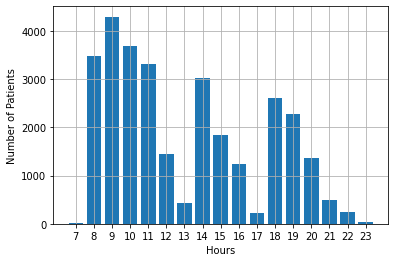

In [14]:
import matplotlib.pyplot as plt
hour = [h for h,v in df.groupby('Entry Hour')]
plt.bar(hour,hours)
plt.xlabel("Hours")
plt.ylabel("Number of Patients")
plt.xticks(hour)
plt.grid()
plt.show()

There are highest number of patients at 9pm

Which Day has highest profit?

In [15]:
df['Total Revenue'] = df['Medication Revenue'] + df['Lab Cost'] + df['Consultation Revenue']
df.head(10)

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Entry Hour,Total Revenue
0,11/4/2019 0:00,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2021-04-12 08:35:45,9:17:54,9:29:46,DR05350C4,C10001,8,1213.39
1,11/6/2019 0:00,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-04-12 19:19:16,21:02:36,21:24:07,DR09451Z4,C10002,19,753.48
2,11/2/2019 0:00,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,2021-04-12 10:46:52,11:56:25,12:06:28,DR17400I4,C10003,10,681.17
3,11/6/2019 0:00,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,2021-04-12 09:38:34,10:55:50,10:58:02,DR09451Z4,C10004,9,600.00
4,11/1/2019 0:00,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-04-12 11:16:21,12:06:49,12:06:54,DR15154H4,C10005,11,603.60
5,11/4/2019 0:00,586.80,0.0,13.00,LOCUM,INSURANCE,OUTPATIENT,2021-04-12 19:22:09,20:14:03,20:15:03,DR64040I4,C10006,19,599.80
6,11/13/2019 0:00,570.18,92.5,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-04-12 09:14:45,10:51:01,10:51:33,DR15154H4,C10007,9,677.68
7,11/2/2019 0:00,493.85,0.0,30.00,FLOATING,INSURANCE,OUTPATIENT,2021-04-12 10:35:00,10:57:26,10:57:36,DR60065B4,C10008,10,523.85
8,11/4/2019 0:00,470.39,0.0,35.52,ANCHOR,HMO,OUTPATIENT,2021-04-12 08:47:59,9:59:22,9:59:29,DR15154H4,C10009,8,505.91
9,11/2/2019 0:00,468.02,10.0,23.91,LOCUM,HMO,OUTPATIENT,2021-04-12 10:01:25,10:32:38,10:35:17,DR04556Z4,C10010,10,501.93


In [16]:
def get_days(x):
  return x.split('/')[1]

In [17]:
df['Days'] = df['Date'].apply(get_days)

In [18]:
df.tail()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Entry Hour,Total Revenue,Days
29994,11/13/2019 0:00,0.0,0.0,0.0,ANCHOR,PRIVATE,OUTPATIENT,2021-04-12 14:01:24,14:08:56,14:15:42,DR18236B4,C39995,14,0.0,13
29995,11/13/2019 0:00,0.0,0.0,0.0,ANCHOR,PRIVATE,OUTPATIENT,2021-04-12 14:01:33,14:21:17,14:21:53,DR04824J4,C39996,14,0.0,13
29996,11/13/2019 0:00,0.0,0.0,0.0,ANCHOR,PRIVATE,OUTPATIENT,2021-04-12 14:01:41,14:13:57,14:16:29,DR15758I4,C39997,14,0.0,13
29997,11/13/2019 0:00,0.0,0.0,0.0,LOCUM,CORPORATE,OUTPATIENT,2021-04-12 14:01:42,14:13:21,14:13:22,DR63323B4,C39998,14,0.0,13
29998,11/13/2019 0:00,0.0,0.0,0.0,ANCHOR,PRIVATE,OUTPATIENT,2021-04-12 14:01:55,14:18:40,14:19:02,DR15758I4,C39999,14,0.0,13


In [19]:
revenue = df.groupby('Days').sum()
revenue

,Medication Revenue,Lab Cost,Consultation Revenue,Entry Hour,Total Revenue
Days,,,,,
1,50137.37,5613.03,35331.60,33102,91082.00
10,22995.01,1078.12,28700.59,15565,52773.72
11,79967.11,6310.93,52254.48,48282,138532.52
12,58490.55,6363.51,39410.16,38664,104264.22
13,28241.23,4264.98,16796.96,13375,49303.17
2,30786.56,3809.37,26941.73,17664,61537.66
3,26517.86,1980.09,30508.05,16385,59006.00
4,71745.28,7230.95,49139.25,44728,128115.48
5,59332.38,6503.59,39764.18,37588,105600.15


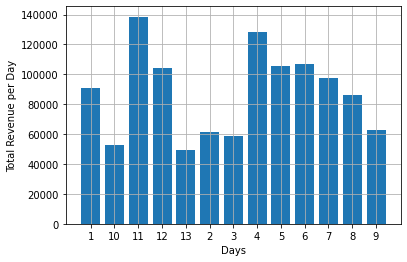

In [20]:
days = [d for d,r in df.groupby('Days')]
plt.bar(days,revenue['Total Revenue'])
plt.xlabel("Days")
plt.ylabel("Total Revenue per Day")
plt.xticks(days)
plt.grid()
plt.show()

11th and 4th dates of Month has more revenue than other days

What percentage of Revenue comes from different insurance types?

In [21]:
df.head(15)

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Entry Hour,Total Revenue,Days
0,11/4/2019 0:00,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2021-04-12 08:35:45,9:17:54,9:29:46,DR05350C4,C10001,8,1213.39,4
1,11/6/2019 0:00,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-04-12 19:19:16,21:02:36,21:24:07,DR09451Z4,C10002,19,753.48,6
2,11/2/2019 0:00,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,2021-04-12 10:46:52,11:56:25,12:06:28,DR17400I4,C10003,10,681.17,2
3,11/6/2019 0:00,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,2021-04-12 09:38:34,10:55:50,10:58:02,DR09451Z4,C10004,9,600.00,6
4,11/1/2019 0:00,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-04-12 11:16:21,12:06:49,12:06:54,DR15154H4,C10005,11,603.60,1
5,11/4/2019 0:00,586.80,0.0,13.00,LOCUM,INSURANCE,OUTPATIENT,2021-04-12 19:22:09,20:14:03,20:15:03,DR64040I4,C10006,19,599.80,4
6,11/13/2019 0:00,570.18,92.5,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-04-12 09:14:45,10:51:01,10:51:33,DR15154H4,C10007,9,677.68,13
7,11/2/2019 0:00,493.85,0.0,30.00,FLOATING,INSURANCE,OUTPATIENT,2021-04-12 10:35:00,10:57:26,10:57:36,DR60065B4,C10008,10,523.85,2
8,11/4/2019 0:00,470.39,0.0,35.52,ANCHOR,HMO,OUTPATIENT,2021-04-12 08:47:59,9:59:22,9:59:29,DR15154H4,C10009,8,505.91,4
9,11/2/2019 0:00,468.02,10.0,23.91,LOCUM,HMO,OUTPATIENT,2021-04-12 10:01:25,10:32:38,10:35:17,DR04556Z4,C10010,10,501.93,2


In [27]:
classes = df.groupby('Financial Class').sum()
classes

,Medication Revenue,Lab Cost,Consultation Revenue,Entry Hour,Total Revenue
Financial Class,,,,,
CORPORATE,160923.52,21020.31,73716.25,86092,255660.08
HMO,130586.81,12281.99,73056.27,47761,215925.07
INSURANCE,307160.57,9509.46,144869.66,130986,461539.69
MEDICARE,20389.14,1813.54,2336.60,3521,24539.28
PRIVATE,0.00,22244.93,164037.95,121763,186282.88


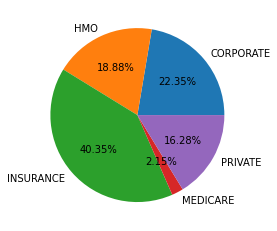

In [29]:
plt.pie(classes['Total Revenue'],labels=classes.index,autopct='%1.2f%%')
plt.show()